In [2]:
#Import apple data from yfinance
import yfinance as yf
data = yf.download("AAPL", start="2020-01-01", end="2024-08-30")

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200
...,...,...,...,...,...,...
2024-08-23,225.660004,228.220001,224.330002,226.839996,226.839996,38677300
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600


In [4]:
#save data to AAPL_data file
import pandas as pd
data.to_csv(r"D:\Python\AAPL_data.csv")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
aapl=pd.read_csv(r"D:\Python\AAPL_data.csv")

In [7]:
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200
...,...,...,...,...,...,...,...
1168,2024-08-23,225.660004,228.220001,224.330002,226.839996,226.839996,38677300
1169,2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
1170,2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600
1171,2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200


In [198]:
#use only Close column
df=aapl.reset_index()['Close']

In [50]:
df

0        75.087502
1        74.357498
2        74.949997
3        74.597504
4        75.797501
           ...    
1169    227.179993
1170    228.029999
1171    226.490005
1172    229.789993
1173    229.000000
Name: Close, Length: 1174, dtype: float64

In [199]:
df.shape

(1174,)

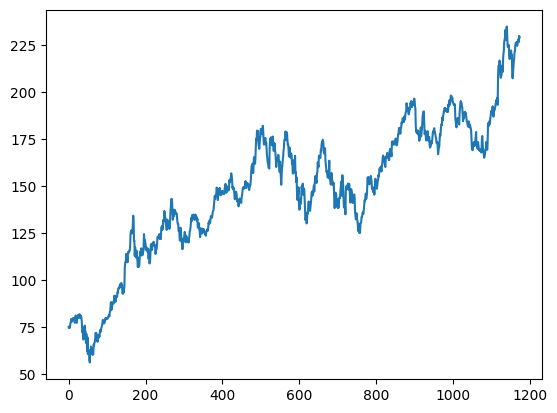

In [200]:
plt.plot(df)

In [201]:
#for sensitive data so we use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [202]:
df

array([[0.10627912],
       [0.10219467],
       [0.10550977],
       ...,
       [0.95339273],
       [0.97185652],
       [0.96743642]])

In [203]:
df.shape

(1174, 1)

In [204]:
#splitting dataset into train data and test
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:]

In [206]:
training_size, test_size

(763, 411)

In [207]:
df[training_size:len(df),:]

array([[0.43259991],
       [0.44015326],
       [0.44675553],
       [0.44267113],
       [0.44300682],
       [0.45755406],
       [0.47568224],
       [0.48362729],
       [0.47987857],
       [0.49162834],
       [0.50265063],
       [0.48625699],
       [0.49347465],
       [0.49985307],
       [0.53001079],
       [0.55060076],
       [0.53510228],
       [0.55143999],
       [0.53616536],
       [0.53029048],
       [0.53107379],
       [0.54696397],
       [0.5433271 ],
       [0.55524471],
       [0.54618066],
       [0.53969031],
       [0.51691817],
       [0.51932411],
       [0.52206566],
       [0.50701489],
       [0.51378492],
       [0.51093145],
       [0.49918168],
       [0.50253878],
       [0.53118572],
       [0.54685204],
       [0.53437497],
       [0.5414807 ],
       [0.52872386],
       [0.5170301 ],
       [0.52805247],
       [0.53991408],
       [0.54215217],
       [0.55815419],
       [0.55339831],
       [0.56682654],
       [0.57734537],
       [0.569

In [208]:
#convert and array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [209]:
# reshape into x=t, t+1,t+2,t+3 and y=t+4
time_step=100
X_train, y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data,time_step)

In [210]:
print(ytest)

[0.68107875 0.6964653  0.69864739 0.71448148 0.71179585 0.71537672
 0.72690263 0.72080398 0.72130752 0.71543272 0.73244182 0.73065134
 0.7227623  0.73837262 0.74503081 0.74693313 0.77143974 0.76299115
 0.75666865 0.75935428 0.75303178 0.74144995 0.73848455 0.7479403
 0.75224847 0.75308779 0.77155166 0.77009688 0.77776224 0.76673987
 0.76008167 0.7646137  0.76948142 0.77440514 0.76724341 0.78184665
 0.78531559 0.78061571 0.76366254 0.75577341 0.70441035 0.68684171
 0.69215705 0.68314892 0.68191798 0.68091082 0.69025473 0.6790085
 0.67408487 0.65970539 0.66244703 0.67000037 0.67777757 0.69954255
 0.67302178 0.68549885 0.69433913 0.71632787 0.7360786  0.73730954
 0.74620582 0.7475486  0.70955784 0.67962397 0.68309291 0.68969518
 0.67257416 0.6608804  0.66944091 0.66535642 0.68191798 0.68807264
 0.66804214 0.65931369 0.66412549 0.67134323 0.64829141 0.63973081
 0.64118559 0.64409507 0.65830662 0.65075318 0.65780308 0.66479696
 0.67923236 0.68762502 0.68426792 0.69215705 0.69724862 0.686841

In [211]:
print(X_train.shape), print(y_train.shape)

(662, 100)
(662,)


(None, None)

In [212]:
print(X_test.shape), print(ytest.shape)

(310, 100)
(310,)


(None, None)

In [213]:
#reshape input to be [sample, time steps, features] which is requied for LSTM
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [214]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\Anup\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [215]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
model.fit(X_train, y_train, validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - loss: 0.1454 - val_loss: 0.0042
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.0083 - val_loss: 0.0282
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0041 - val_loss: 0.0183
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - loss: 0.0034 - val_loss: 0.0118
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0029 - val_loss: 0.0141
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0024 - val_loss: 0.0091
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 0.0022 - val_loss: 0.0063
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2

In [217]:
import tensorflow as tf

In [149]:
tf.__version__

'2.17.0'

In [218]:
#Lets Do the prediction and check performance matrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [219]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [221]:
import math
from sklearn.metrics import mean_squared_error

In [222]:
## Calculate RMSE performance metrics
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training Data RMSE: {train_rmse}')

Training Data RMSE: 140.96138209407468


In [223]:
# Assuming test_predict contains predictions for test set
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))
print(f'Test Data RMSE: {test_rmse}')

Test Data RMSE: 188.45843258347682


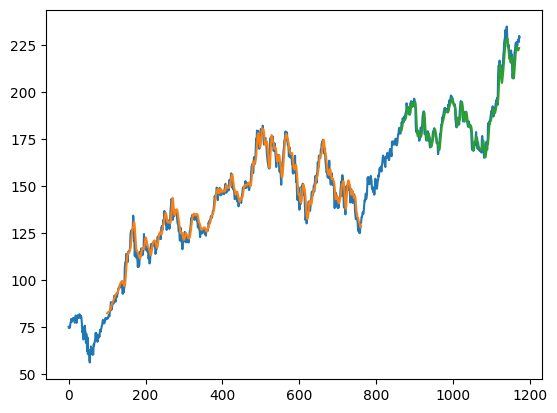

In [224]:
##Plotting Shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#sift test predictions for ploting
testPredictPlot=np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df)-1, :] = test_predict

#Plt baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [225]:
len(test_data)

411

In [226]:
x_input=test_data[311:].reshape(1,-1)
x_input.shape

(1, 100)

In [227]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [228]:
temp_input

[0.6249038041725298,
 0.6655242691806412,
 0.673972939326152,
 0.652375812830197,
 0.6338560136927194,
 0.6261347351159208,
 0.6207633923288876,
 0.6093494062965131,
 0.6140492778760439,
 0.6199800803989657,
 0.6318417708194066,
 0.6367094888571637,
 0.6334083946792501,
 0.6569078379515014,
 0.6391713507439457,
 0.6334083946792501,
 0.6542781296064931,
 0.7121875481832883,
 0.7028437253854364,
 0.7067042792992387,
 0.7086066814501321,
 0.7188457422749223,
 0.7103411517682018,
 0.72841333189221,
 0.7348476737898108,
 0.7476605225983998,
 0.748331908431305,
 0.7484997548895312,
 0.7550460228841486,
 0.7623756881832847,
 0.7542627109542269,
 0.7317704318059305,
 0.7491152203612267,
 0.7491712260970339,
 0.7508496906792966,
 0.7564448002857659,
 0.7618161430727991,
 0.7717754313423465,
 0.7735659073962232,
 0.7820704125283465,
 0.7742932135903381,
 0.7877774482318324,
 0.7666838611105561,
 0.8451832420593516,
 0.8783063660592948,
 0.8848526340539121,
 0.8750611922425912,
 0.898448709417825

In [229]:
# demonstrte prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if (len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}". format(i, x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #Print(x_inputempt)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}". format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1        
print(lst_output)   

[0.94617695]
101
1 day input [0.66552427 0.67397294 0.65237581 0.63385601 0.62613474 0.62076339
 0.60934941 0.61404928 0.61998008 0.63184177 0.63670949 0.63340839
 0.65690784 0.63917135 0.63340839 0.65427813 0.71218755 0.70284373
 0.70670428 0.70860668 0.71884574 0.71034115 0.72841333 0.73484767
 0.74766052 0.74833191 0.74849975 0.75504602 0.76237569 0.75426271
 0.73177043 0.74911522 0.74917123 0.75084969 0.7564448  0.76181614
 0.77177543 0.77356591 0.78207041 0.77429321 0.78777745 0.76668386
 0.84518324 0.87830637 0.88485263 0.87506119 0.89844871 0.88513232
 0.85933886 0.84708564 0.85072243 0.85592593 0.87931344 0.88406932
 0.86459828 0.89889633 0.91859114 0.92575287 0.95255341 0.96083423
 0.96564595 0.98970493 0.95943546 0.97605285 0.99764998 1.
 0.96676504 0.94046795 0.94119534 0.93923711 0.9451119  0.90891154
 0.90303674 0.90566645 0.90723307 0.91036632 0.92871827 0.90790446
 0.91629712 0.85704493 0.84563086 0.86012226 0.87964914 0.89604285
 0.90326051 0.92418625 0.92670403 0.94348

In [230]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [231]:
len(df)

1174

In [232]:
df2=df.tolist()
df2.extend(lst_output)

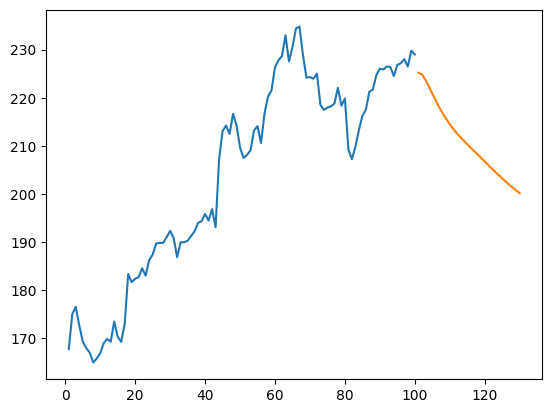

In [233]:
plt.plot(day_new,scaler.inverse_transform(df[1074:])) #len(df)-100 days
plt.plot(day_pred,scaler.inverse_transform(lst_output))

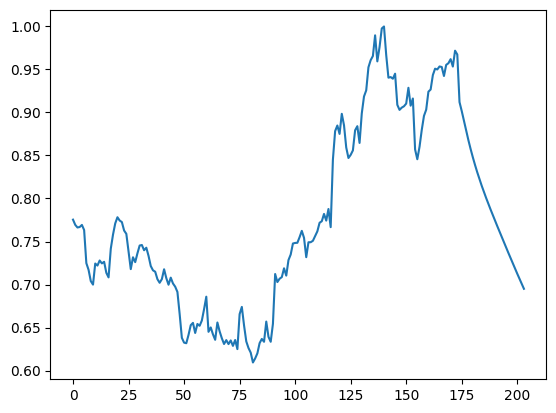

In [186]:
plt.plot(df2[1000:])

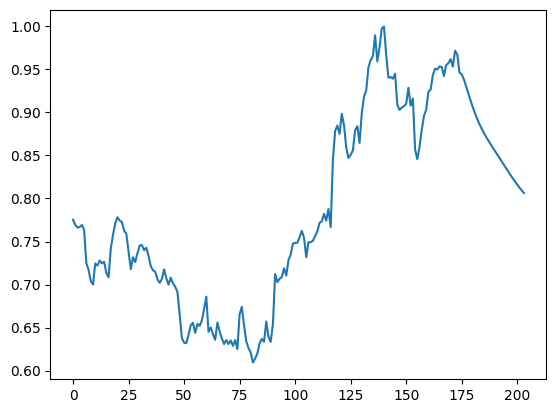

In [234]:
df2=df.tolist()
df2.extend(lst_output)
plt.plot(df2[1000:])

In [ ]:
#https://www.youtube.com/watch?v=H6du_pfuznE&t=1s

In [ ]:
#https://www.youtube.com/watch?v=1O_BenficgE&list=TLPQMjgwODIwMjTGvVu5PjwXsQ&index=2